<a href="https://colab.research.google.com/github/fabiobaroliveira/analises/blob/main/analise_exploratoria_frota_nacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Consulta e extração de informações sobre a frota nacional, espeficicando uma montadora.

In [1]:
# Importando todas bibliotecas necessárias

import requests
import zipfile
import io
import os
import pandas as pd
from tqdm import tqdm

In [3]:
# Carregando arquivo direto do site

# URL do arquivo .zip
url = 'https://dados.transportes.gov.br/dataset/12686da0-3d71-4499-b432-d270f785c907/resource/fc7e76f6-a46f-4c90-a952-2dc6d2bd8196/download/i_frota_por_uf_municipio_marca_e_modelo_ano_dezembro_2024.zip'

# Faz o download do arquivo com barra de progresso
print("Iniciando download do arquivo...")
response = requests.get(url, stream=True)  # stream=True para download em partes

# Verifica se o download foi bem-sucedido
if response.status_code == 200:
    # Obtém o tamanho total do arquivo (em bytes)
    total_size = int(response.headers.get('content-length', 0))
    block_size = 1024  # 1 Kibibyte

    # Cria um buffer para armazenar o conteúdo
    file_buffer = io.BytesIO()

    # Barra de progresso para o download
    with tqdm(total=total_size, unit='iB', unit_scale=True, desc="Download") as pbar:
        for data in response.iter_content(block_size):
            file_buffer.write(data)
            pbar.update(len(data))  # Atualiza a barra de progresso

    print("\nDownload concluído com sucesso!")

    # Prepara para extrair o arquivo
    file_buffer.seek(0)  # Volta ao início do buffer

    # Extrai o conteúdo do arquivo .zip com barra de progresso
    print("\nExtraindo arquivos...")
    with zipfile.ZipFile(file_buffer) as zip_file:
        # Obtém lista de arquivos para extração
        file_list = zip_file.infolist()

        # Barra de progresso para extração
        for file in tqdm(file_list, desc="Extraindo"):
            zip_file.extract(file, 'dados_extraidos')

    print("Extração concluída com sucesso!")

    # Renomeia o arquivo
    caminho_original = os.path.join('dados_extraidos', 'Layout I.TXT')
    novo_nome = os.path.join('dados_extraidos', 'base_de_dados.txt')

    if os.path.exists(caminho_original):
        os.rename(caminho_original, novo_nome)
        print(f"Arquivo renomeado para: {novo_nome}")
    else:
        print("Arquivo original não encontrado.")
else:
    print(f"Erro ao baixar o arquivo: {response.status_code}")

Iniciando download do arquivo...


Download: 100%|██████████| 128M/128M [03:27<00:00, 616kiB/s]



Download concluído com sucesso!

Extraindo arquivos...


Extraindo: 100%|██████████| 1/1 [00:12<00:00, 12.13s/it]

Extração concluída com sucesso!
Arquivo renomeado para: dados_extraidos/base_de_dados.txt


In [8]:
# Analisando o arquivo

# Caminho do arquivo
caminho_arquivo = os.path.join('dados_extraidos', 'base_de_dados.txt')

# Verifica se o arquivo existe
if os.path.exists(caminho_arquivo):
    print("Carregando o arquivo...")

    try:
        # Configuração do pandas para mostrar todas as colunas no info()
        pd.set_option('display.max_columns', None)

        # Carrega o arquivo em chunks (pedaços) para arquivos grandes
        chunks = pd.read_csv(caminho_arquivo,
                           encoding='utf-8',
                           delimiter=';',
                           chunksize=10000,
                           low_memory=False)

        # Concatena todos os chunks em um único DataFrame
        df = pd.concat(chunks)

        # Mostra apenas as informações do DataFrame
        print("\nInformações completas do DataFrame:")
        df.info(verbose=True, memory_usage='deep', show_counts=True)

    except Exception as e:
        print(f"\nErro ao ler o arquivo: {e}")
else:
    print("Arquivo não encontrado. Verifique o caminho.")

Carregando o arquivo...

Informações completas do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21105272 entries, 0 to 21105271
Data columns (total 5 columns):
 #   Column                      Non-Null Count     Dtype  
---  ------                      --------------     -----  
 0   UF                          21105272 non-null  object 
 1   Município                   21105272 non-null  object 
 2   Marca Modelo                21105272 non-null  object 
 3   Ano Fabricação Veículo CRV  21105272 non-null  object 
 4   Qtd. Veículos               21105272 non-null  float64
dtypes: float64(1), object(4)
memory usage: 5.5 GB


In [10]:
# Verificando as 10 primeiras linhas
display(df.head(10))

,UF,Município,Marca Modelo,Ano Fabricação Veículo CRV,Qtd. Veículos
0,ACRE,ACRELANDIA,AGRALE/13000,2009,1.0
1,ACRE,ACRELANDIA,AGRALE/1800,1989,1.0
2,ACRE,ACRELANDIA,AGRALE/1800,1990,1.0
3,ACRE,ACRELANDIA,AGRALE/1800D RD,1989,1.0
4,ACRE,ACRELANDIA,AGRALE/1800D RD,1990,2.0
5,ACRE,ACRELANDIA,AGRALE/1800D RD,1993,1.0
6,ACRE,ACRELANDIA,AGRALE/6000 D,2005,1.0
7,ACRE,ACRELANDIA,AGRALE/6000 D,2008,1.0
8,ACRE,ACRELANDIA,AGRALE/6000 D,2010,1.0
9,ACRE,ACRELANDIA,AGRALE/7000D RD,1994,1.0


In [12]:
# Analisando a coluna "Marca Modelo"

# Extrai os valores únicos da coluna "Marca Modelo"
valores_unicos = df['Marca Modelo'].unique()

# Converte para lista e ordena alfabeticamente
lista_valores = sorted(list(valores_unicos))

# Exibe os valores
print("Valores únicos da coluna 'Marca Modelo':")
for i, valor in enumerate(lista_valores, 1):
    print(f"{i}. {valor}")

# Mostra quantos valores diferentes existem
print(f"\nTotal de valores únicos: {len(lista_valores)}")

Valores únicos da coluna 'Marca Modelo':
1. A.AILTIS/F.PROPRIA TRIC
2. A.ALBUQUERQUE/F.PROPRIA
3. A.ANGELO/F.PROPRIA TRI
4. A.ARAUJO/F.PROPRIA TRIC
5. A.ATAIDES/F.PROPRIA TRIC
6. A.AZEVEDO/F.PROPRIA TRI
7. A.BALSANI/ F.PROPRIA MOT
8. A.BARTON/F.PROPRIA TRI
9. A.BEAL/ F.PROPRIA TRIC
10. A.BIAZUS/F.PROPRIA TRIC
11. A.BIAZUS/F.PROPRIA TRIC2
12. A.BONILHA/F.PROPRIA TRIC
13. A.BOSCO/ F.PROPRIA TRIC
14. A.CAIXETA/F.PROPRIA TRIC
15. A.CARDOSO/F.PROPRIA TRIC
16. A.CASTELLEN/F.PROPRIA TR
17. A.CLERIS/ F.PROPRIA TRIC
18. A.COLLARINO/F.PROPRIA TR
19. A.CONTE/F.PROPRIA TRIC
20. A.DALLA/ F.PROPRIA TRIC
21. A.DAMBROSKI/F.PROPRIA T
22. A.DJANIRO/F.PROPRIA TRIC
23. A.EUSTAQUIO/F.PROPRIA TR
24. A.FAUST/F.PROPRIA TRIC
25. A.FELISOLA/F.PROPRIA TRI
26. A.FILHO/F.PROPRIA TRI
27. A.FONSECA/F.PROPRIA TRIC
28. A.FRAGA/F.PROPRIA TRI 01
29. A.FRAGA/F.PROPRIA TRI02
30. A.FRAGA/F.PROPRIA TRICIC
31. A.FREGONESE/F.PROPRIA T
32. A.GIRARDI/F.PROPRIA TRIC
33. A.GLITZ/ F.PROPRIA TRIC
34. A.GONZALEZ/F.PROPRIA TRI
35. A.

#Observação:

Nota-se de a grande variedades de fabricantes e modelos, porém a dificuldade em analisar esses dados é que ao longo dos anos fabricantes foram registrados de diferentes formas, como exemplo a fabricante alemã Mercedes-Benz, que teve registro como "M.BENZ", "MERCEDES BENZ" entre outros.



In [20]:
# Criando o DataFrame consolidado por UF

df_veiculos_uf = (
    df.groupby('UF', as_index=False)['Qtd. Veículos']  # Agrupa por UF mantendo a coluna
    .sum()  # Soma a quantidade de veículos
    .astype({'Qtd. Veículos': int})  # Converte o numero para inteiro
    .sort_values('Qtd. Veículos', ascending=False)  # Ordena do maior para o menor
    .rename(columns={'Qtd. Veículos': 'Total de Veículos'})  # Renomeia a coluna
)

# Calculando o total geral
total_geral = df_veiculos_uf['Total de Veículos'].sum()

# Adicionando a coluna de porcentagem
df_veiculos_uf['Porcentagem do Total'] = (
    (df_veiculos_uf['Total de Veículos'] / total_geral * 100)
    .round(2)  # 2 casas decimais
)

# Visualizando o resultado
print("DataFrame consolidado por UF:")
display(df_veiculos_uf.head())  # Mostra as primeiras linhas

DataFrame consolidado por UF:


,UF,Total de Veículos,Porcentagem do Total
26,SAO PAULO,34332821,27.08
12,MINAS GERAIS,13975853,11.02
17,PARANA,9179768,7.24
22,RIO GRANDE DO SUL,8311600,6.56
20,RIO DE JANEIRO,7973983,6.29


In [21]:
# Criando novo arquivo .csv

df_veiculos_uf.to_csv('veiculos_por_uf.csv', index=False, sep=';')

Extraindo informações por Ano Fabricação

In [29]:
# Criando o DataFrame consolidado por Ano Fabricação Veículo CRV
df_veiculos_ano = (
    df.groupby('Ano Fabricação Veículo CRV', as_index=False)['Qtd. Veículos']  # Agrupa por "Ano Fabricação Veículo CRV" mantendo a coluna
    .sum()  # Soma a quantidade de veículos
    .astype({'Qtd. Veículos': int})  # Converte o numero para inteiro
    .sort_values('Qtd. Veículos', ascending=False)  # Ordena do maior para o menor
    .rename(columns={
        'Ano Fabricação Veículo CRV': 'Ano Fabricação',
        'Qtd. Veículos': 'Total de Veículos'})  # Renomeia as colunas
    .assign(
        Porcentagem=lambda x: (x['Total de Veículos'] / x['Total de Veículos'].sum() * 100).round(2)
    )
)

display(df_veiculos_ano.head(10))

,Ano Fabricação,Total de Veículos,Porcentagem
171,2011,6053396,4.77
173,2013,5611682,4.43
170,2010,5444334,4.29
172,2012,5429993,4.28
168,2008,5305395,4.18
174,2014,5006289,3.95
169,2009,4735802,3.74
167,2007,4346310,3.43
183,2023,4150612,3.27
184,2024,4023135,3.17


In [28]:
# Criando novo arquivo .csv

df_veiculos_ano.to_csv('veiculos_por_ano.csv', index=False, sep=';')

#Analisando frota por UF e Ano Fabricação

In [ ]:
# Criando um dicionário de DataFrames, um para cada UF

dfs_por_uf = {}

for uf in df['UF'].unique():
    dfs_por_uf[uf] = (
        df[df['UF'] == uf]  # Filtra apenas os dados da UF atual
        .groupby('Ano Fabricação Veículo CRV', as_index=False)['Qtd. Veículos']
        .sum()
        .astype({'Qtd. Veículos': int})
        .sort_values('Qtd. Veículos', ascending=False)
        .rename(columns={
            'Ano Fabricação Veículo CRV': 'Ano Fabricação',
            'Qtd. Veículos': 'Total de Veículos'
        })
        .assign(
            Porcentagem=lambda x: (x['Total de Veículos'] / x['Total de Veículos'].sum() * 100).round(2)
        )
    )


In [37]:
# Escolhendo qual a UF

escolha_estado = input("Digite o nome do estado sem acento (ex: SAO PAULO): ").upper()

if escolha_estado in dfs_por_uf:
    print(f"\nDataFrame para o estado {escolha_estado}:")
    display(dfs_por_uf[escolha_estado].head(10))
else:
    print(f"Estado '{escolha_estado}' não encontrado.")


Digite o nome do estado sem acento (ex: SAO PAULO): sao paulo

DataFrame para o estado SAO PAULO:


,Ano Fabricação,Total de Veículos,Porcentagem
111,2011,1531872,4.46
108,2008,1437930,4.19
110,2010,1400359,4.08
113,2013,1334671,3.89
112,2012,1321840,3.85
107,2007,1258686,3.67
109,2009,1210264,3.53
114,2014,1161158,3.38
119,2019,1052965,3.07
118,2018,996746,2.90


In [38]:
# Criando novo arquivo .csv

 # Criando o nome do arquivo
nome_arquivo = f"df_veiculos_uf_ano_{escolha_estado.lower().replace(' ', '_')}.csv"

    # Salvando como CSV
dfs_por_uf[escolha_estado].to_csv(nome_arquivo, index=False, sep=';', encoding='utf-8-sig')
print(f"\nArquivo salvo como: {nome_arquivo}")


Arquivo salvo como: df_veiculos_uf_ano_sao_paulo.csv


Digite o nome do estado sem acento (ex: SAO PAULO): Sao paulo


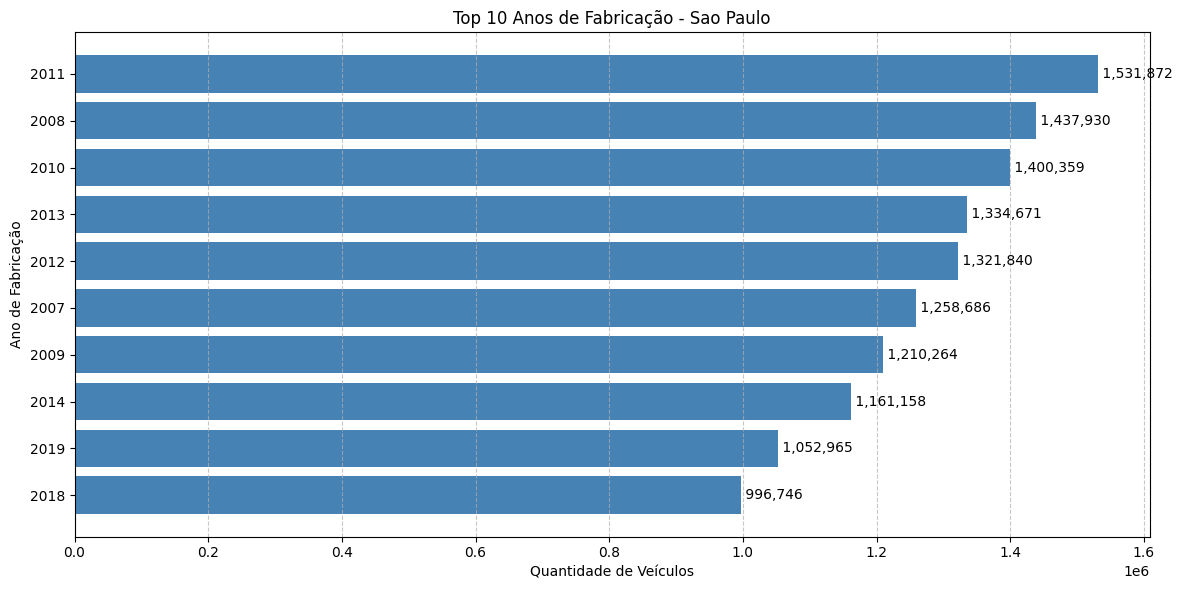

In [41]:
import matplotlib.pyplot as plt

escolha_estado = input("Digite o nome do estado sem acento (ex: SAO PAULO): ").upper()

if escolha_estado in dfs_por_uf:
    # Pegar os 10 primeiros valores
    top_10 = dfs_por_uf[escolha_estado].head(10)

    # Configurar o gráfico
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_10['Ano Fabricação'], top_10['Total de Veículos'], color='steelblue')

    # Adicionar valores nas barras
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f' {width:,}',
                 va='center', ha='left')

    # Configurações do gráfico
    plt.title(f'Top 10 Anos de Fabricação - {escolha_estado.title()}')
    plt.xlabel('Quantidade de Veículos')
    plt.ylabel('Ano de Fabricação')
    plt.gca().invert_yaxis()  # Inverte para mostrar o maior no topo
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

else:
    print(f"Estado '{escolha_estado}' não encontrado.")